In [50]:
# Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats 
import numpy as np

In [51]:
# Import file / Preview dataframe
samples = pd.read_csv('cleansamples.csv')
samples.head(5)

,Yr,Mn,Date,Date.1,CO2 [ppm],seasonally adjusted [ppm],fit [ppm],seasonally adjusted fit [ppm],CO2 filled [ppm],seasonally adjusted filled[ppm]
0,1969,1,25218,1969.0411,331.44,329.61,329.00,327.16,331.44,329.61
1,1969,2,25249,1969.1260,326.52,324.31,329.29,327.08,326.52,324.31
2,1969,3,25277,1969.2027,-99.99,-99.99,329.61,327.00,329.61,327.00
3,1969,4,25308,1969.2877,327.92,324.60,330.26,326.94,327.92,324.60
4,1969,5,25338,1969.3699,-99.99,-99.99,330.29,326.89,330.29,326.89


In [52]:
# Select Columns / Find means
overallMean = samples['CO2 filled [ppm]'].mean()

samples = samples[['Yr','CO2 filled [ppm]']]
samples = samples.groupby('Yr').mean()

In [53]:
samples.head(10)

,CO2 filled [ppm]
Yr,
1969,326.619167
1970,326.974167
1971,327.685833
1972,328.686667
1973,329.950000
1974,331.978333
1975,332.672500
1976,333.650000
1977,335.596667


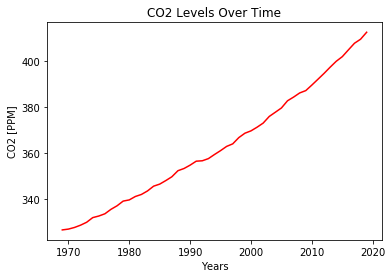

In [54]:
# Plot and save figure
plt.title('CO2 Levels Over Time')
plt.xlabel('Years')
plt.ylabel('CO2 [PPM]')
plt.plot(samples,color='r')
plt.savefig('CO2Time.png')

In [157]:
# Import seawater temps
water = pd.read_csv('water_surface_temp.csv')
surfTemps = water[['YEAR','MONTH','DAY','SURF_TEMP_C']]
floorTemps = water[['YEAR','MONTH','DAY','BOT_TEMP_C']]

surfTemps = surfTemps.groupby('YEAR').mean()
surfTemps = surfTemps[1969:2019][['SURF_TEMP_C']]
surfTemps.head()

,SURF_TEMP_C
YEAR,
1969.0,16.669315
1970.0,16.660440
1971.0,16.205753
1972.0,16.893443
1973.0,16.466849


In [158]:
# Join dataframes
samples['Surf_Temp'] = surfTemps['SURF_TEMP_C']
# samples = samples.rename({"CO2 filled [ppm]":"CO2 [ppm]","Surf_Temp":"Water Temperature"},axis='columns')
samples.head()


# Thru 2018, 2019 dataset stops at May which would throw off averages
samples = samples.loc[:2018]

In [165]:
# Run T Test Between CO2 and Water Temperatures (-4.69 indicates a high chance of proving our hypothesis)
stats.ttest_ind(samples['CO2 filled [ppm]'],samples['Surf_Temp'])

Ttest_indResult(statistic=99.0509737077081, pvalue=4.696185992088722e-100)

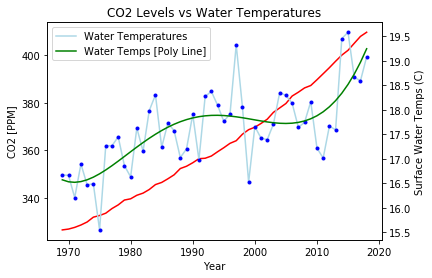

In [80]:
# Plot sea temps vs co2 levels

fig, ax1 = plt.subplots()
ax1.plot(samples['CO2 filled [ppm]'],color='red',label='CO2 Levels')

ax2 = ax1.twinx() 
ax2.plot(samples['Surf_Temp'],color='lightblue',label='Water Temperatures')

plt.title('CO2 Levels vs Water Temperatures')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 [PPM]')
ax2.set_ylabel('Surface Water Temps (C)')

yr = samples.index
tmp = samples['Surf_Temp']
z = np.polyfit(yr, tmp, 5)
p = np.poly1d(z)

ax2.plot(yr, tmp, '.',color='b')
ax2.plot(yr, p(yr), '-',color='g', label='Water Temps [Poly Line]')

plt.legend()



plt.savefig('CO2Water.png')
#legend

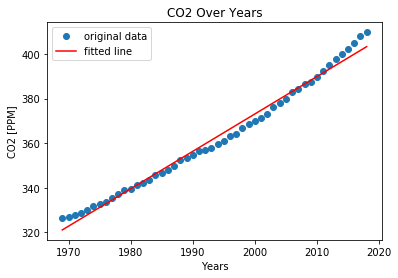

In [166]:
# Linear regression on Temps 
from scipy import stats

x = samples.index
y = samples['CO2 filled [ppm]']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.title('CO2 Over Years')
plt.xlabel('Years')
plt.ylabel('CO2 [PPM]')
plt.legend(loc='best')

plt.savefig('CO2Linregress.png')

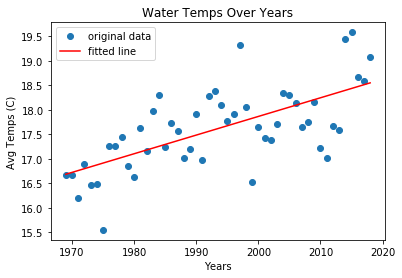

In [83]:
# Linear regression on Temps 
x = samples.index
y = samples['Surf_Temp']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.title('Water Temps Over Years')
plt.xlabel('Years')
plt.ylabel('Avg Temps (C)')



# z = np.polyfit(x, y, 10)
# p = np.poly1d(z)

# plt.plot(x, y, '.',color='b')
# plt.plot(x, p(x), '-',color='g', label='Water Temps [Poly Line]')

plt.legend(loc='best')

plt.savefig('Waterlinregress.png')

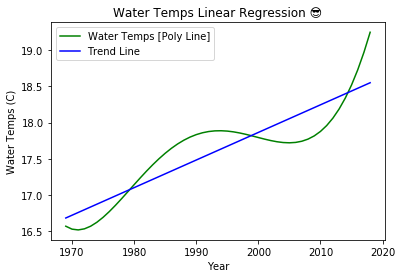

In [156]:
# Plot poly line vs linear regression for temps
fig, ax1 = plt.subplots()

plt.title('Water Temps Linear Regression 😎')
ax1.set_xlabel('Year')
ax1.set_ylabel('Water Temps (C)')


x = samples.index
y = samples['Surf_Temp']
z = np.polyfit(yr, tmp, 5)
p = np.poly1d(z)

ax1.plot(yr, p(yr), '-',color='g', label='Water Temps [Poly Line]')


slope, intercept, r_value, p_value, std_err = stats.linregress(yr,tmp)
plt.plot(x, intercept + slope*x, 'b', label='Trend Line')

plt.legend()

plt.savefig('Polylinregress.png')


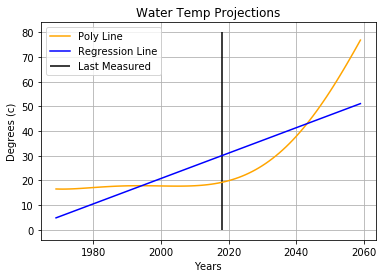

In [155]:
# projections to 2060 (conservative estimation)
fig,ax1 = plt.subplots()

plt.title('Water Temp Projections')
x = np.arange(1969, 2060, 1)
y = p(py)
ax1.plot(x,y,label='Poly Line',color='orange')

plt.xlabel('Years')
plt.ylabel('Degrees (c)')

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax1.plot(x, intercept + slope*x, 'b', label='Regression Line')
plt.vlines(2018,0,80,label='Last Measured')

plt.grid()
plt.legend()
plt.savefig('Waterprojections.png')

In [164]:
# Change in averages from 1969 to 2018
samples['CO2 filled [ppm]']
samples.iloc[49] - samples.iloc[0]


CO2 filled [ppm]    83.086667
Surf_Temp            2.413266
dtype: float64

In [180]:
# Average change PPM 
carbonList = samples['CO2 filled [ppm]'].tolist()
carbonList.pop(0)

length = len(carbonList)
diff = [carbonList[i] - carbonList[i-1] for i in range(length)]
# diff
carbonList

[326.9741666666667,
 327.68583333333333,
 328.68666666666667,
 329.95,
 331.97833333333335,
 332.67249999999996,
 333.65,
 335.59666666666664,
 337.1325,
 339.17499999999995,
 339.6916666666667,
 341.1816666666667,
 342.0758333333333,
 343.60083333333336,
 345.675,
 346.5741666666666,
 348.10833333333335,
 349.7775,
 352.41833333333335,
 353.3808333333333,
 354.84499999999997,
 356.56333333333333,
 356.74166666666673,
 357.68000000000006,
 359.4708333333333,
 361.16499999999996,
 363.01,
 364.11416666666656,
 366.8425,
 368.7525,
 369.78,
 371.37500000000006,
 373.16249999999997,
 376.05999999999995,
 377.8975,
 379.75083333333333,
 382.88416666666666,
 384.4966666666667,
 386.2991666666667,
 387.3158333333334,
 389.7383333333333,
 392.2633333333333,
 394.80999999999995,
 397.5166666666667,
 400.08833333333337,
 402.1091666666666,
 405.05333333333334,
 407.9508333333333,
 409.7058333333334]